<img alt="Colaboratory logo" width="100%" src="https://tradeturismo.com.br/novo/wp-content/uploads/2018/10/fazer-em-amsterda-1200x565.jpg">

#### **Data Science na Prática 2.0**
*by [Rickson Gomes Monteiro](https://bit.ly/3aqNqW2)*

---

# Análise dos Dados do Airbnb - *Amsterdam*

O [Airbnb (Air, bed and Breakfast)](https://www.airbnb.com.br/) é uma plataforma digital que surgiu no ano de 2008 criada pelos jovens Nathan, Brian e Joe, que no momento estavam passando por dificuldades financeiras e sem capital para pagar o aluguel do apartamento em que moravam quando se depararam com uma conferência de designers em São Francisco, Califónia (Cidade em que moravam). No entanto, perceberam que grande parte dos hotéis estavam com lotação completa. Dessa forma, resolveram alugar alguns espaços em seu apartamento como a sala, quarto dos fundos e até mesmo um colchão inflável haha! Conseguindo assim adquirir o dinheiro para pagar o aluguel que estava atrasado.  

Essa forma que pensaram para quitar o aluguel veio a se tornar o Airbnb que no final de 2018 já havia hospedado mais de **300 milhões** de pessoas ao redor de rodo o mundo sendo considerado **a maior rede hoteleira da atualidade.** Ah, o detalhe é que ele **não possui nenhum hotel!** Demonstrando o poder que a internet tem nos negócios atuais. 

<center>
<img alt="Colaboratory logo" width="75%" src="https://computerworld.com.br/wp-content/uploads/2020/03/Airbnb-oferecer%C3%A1-100-mil-acomoda%C3%A7%C3%B5es-para-profissionais-de-sa%C3%BAde.jpg">
</center>

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
 
 **Neste *notebook*, é realizada uma analise dos dados referentes à cidade Amsterdam-Holanda, afim de ver quais insights podem ser extraídos a partir de dados brutos disponíveis no portal citado acima.**
 
Para os que desconhecem, **Amsterdam** é a capital holandesa, Possuindo uma população de aproximadamente 7 milhões de habitantes. Essa cidade se destaca pelo governo ideologicamente muito tolerante, além de ser sede de grandes empresas como a Heineken e a Phillips. Mantendo ainda 4 universidades em seu território.

<img alt="Colaboratory logo" width="100%" src="https://www.adagio-city.com/sites/default/files/2019-01/1_pays-bas_amsterdam-canaux-nuits.jpg?twic=v1/cover=1280x380">
</center>


## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
Para a análise explanatória inicial, será baiado apenas o seguinte arquivo:


* `listings.csv`- *Summary information and metrics for listings in Amsterdam (good for visualisations).*

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df= pd.read_csv('http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-02-08/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id`- Número do id do imóvel
* `Name`- Nome do imóvel anunciado 
* `host_id`- Número do proprietátio (Anfitrião)
* `host_name`- Nome do proprietário (Anfitrião)
* `neighbourhood_group`- Está coluna não possui informações preenchidas
* `neighbourhood`- Nome do Bairro
* `Latitude`- Coordenadas da latitude do imóvel
* `Longitude`- Coordenadas da Longitude do imóvel
* `room_type`- Tipo de quarto oferecido
* `price`- Preço para alugar o imóvel
* `minimum_nights`- quantidade mínima de noites para reservar 
* `number_of_reviews`- número de reviews que a propriedade possui
* `last_review`- Data do último review
* `reviews_per_month`- quantidade de reviews por mês
* `calculated_host_listings_count`-Quantidade de imóveis do mesmo anfitrião
* `availability_365`- Número de dias de disponibilidade dentro de 365 dias.


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.92,1,139
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,129,1,339,2020-04-09,2.54,2,0
2,25428,"Lovely, spacious 1 bed apt in Center(with lift)",56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.13,1,251
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,125,2,219,2020-07-25,1.98,1,136
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.63,2,338


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print('Entradas: {}'.format(df.shape[0]))
print('Variáveis: {}'.format(df.shape[1]))


# verificar os tipos das variáveis do dataset
print(df.dtypes)

Entradas: 18291
Variáveis: 16
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.130611
last_review                       0.130611
host_name                         0.003444
name                              0.001804
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc8576f60>,
      dtype=object)

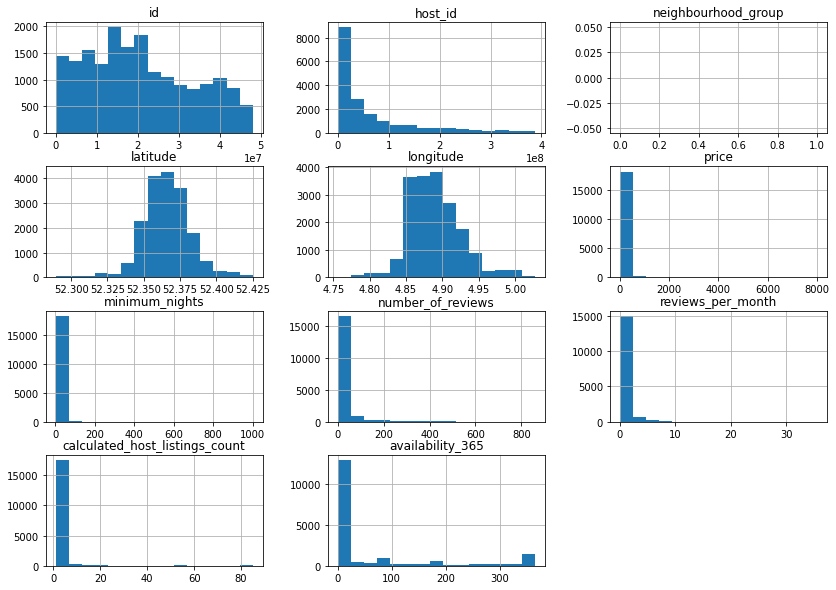

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(14,10))

#**Q4. Há outliers presentes?**
Antes de responder essa pergunta é necessário entender o que são outliers. 
<center>
  <img alt="outlier" width="75%" src="https://miro.medium.com/max/875/1*vIh6zIIjgg0ikyFX-pa8VA.png">
</center>

Outliers são dados que fogem do padrão de um conjunto. Ou seja, diferenciam drasticamente dos outros, como no exemplo acima.

Pela distribuição dos histogramas visto anteriormente é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`. Os valores não seguem uma distribuição gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detcção de *outliers*. São elas:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável 

In [7]:
#Ver resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18291.000000,18291.000000,18291.000000,15902.000000,18291.000000,18291.000000
mean,153.055984,3.727407,24.125198,0.591448,2.647477,61.923132
std,163.034869,16.331468,54.560889,1.065085,8.724302,115.602325
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,95.000000,2.000000,2.000000,0.130000,1.000000,0.000000
50%,128.000000,2.000000,8.000000,0.280000,1.000000,0.000000
75%,180.000000,3.000000,22.000000,0.580000,1.000000,78.000000
max,8000.000000,1001.000000,859.000000,35.530000,85.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:
* A variável `price` possui 75% do valor abaixo de 180, porém seu valor máximo é 8000,00
* Desvio padrão muito alto: 163.034869
* Existem valores de `minimum_nigths` acima de 365 dias, basta olhar o valor maximo para essa variável (1001.00)
 

#Boxplot para `minimum_nights`

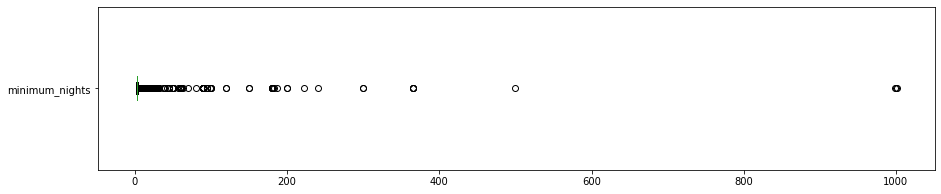

minimum_nights: Valores acima de 30 dias
91 Entradas
0.4975%


In [8]:
#minimum_nights
df.minimum_nights.plot(kind='box',vert=False, figsize=(15,3))
plt.show()
#Ver quantidade de valores acima de 30 dias para minimum_nigths
print("minimum_nights: Valores acima de 30 dias")
print("{} Entradas".format(len(df[df.minimum_nights>30])))
print("{:.4f}%".format(len(df.minimum_nights[df.minimum_nights>30])/df.shape[0]*100))

#BoxPlot para `price`


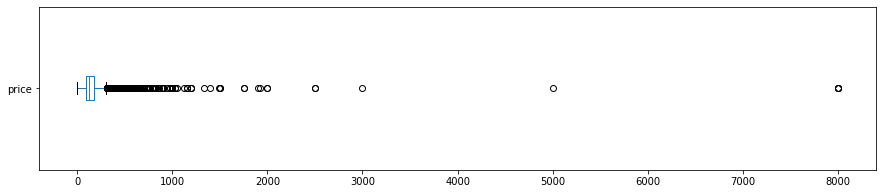

Price acima de 400:
Entradas: 400
2.1869%


In [9]:
#price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#Entradas acima de 400
print("Price acima de 400:")
print("Entradas: {}".format(len(df.price[df.price>400])))
print("{:.4f}%".format(100*(len(df.price[df.price>400])/df.shape[0])))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Analisando os boxplots e os valores gerados pode-se perceber que existem alguns valores muito elevados, próximos de 400, 600 e 1000 dias para a variável `minimum_nights` e próximos a 3000, 5000, 8000 para variável `price`. No entanto os números de vezes que alugaram o imóvel por mais de 30 dias não representa nem 1% em relação ao conjunto total dos dados. De mesmo modo os alugueis em que a diária corresponde a valores maiores que €400,00 representa aproximadamente apenas 2,19% do conjunto.

### **Q4. Qual a média dos preços de aluguel?**


#Histogramas sem outliers
Com a identificação dos *outliers* presentes nas variáveis `price` e `minimum_nights`, será realizada uma limpeza no DataFrame afim de plotar novamente o histograma afim de tirar alguma hipótese

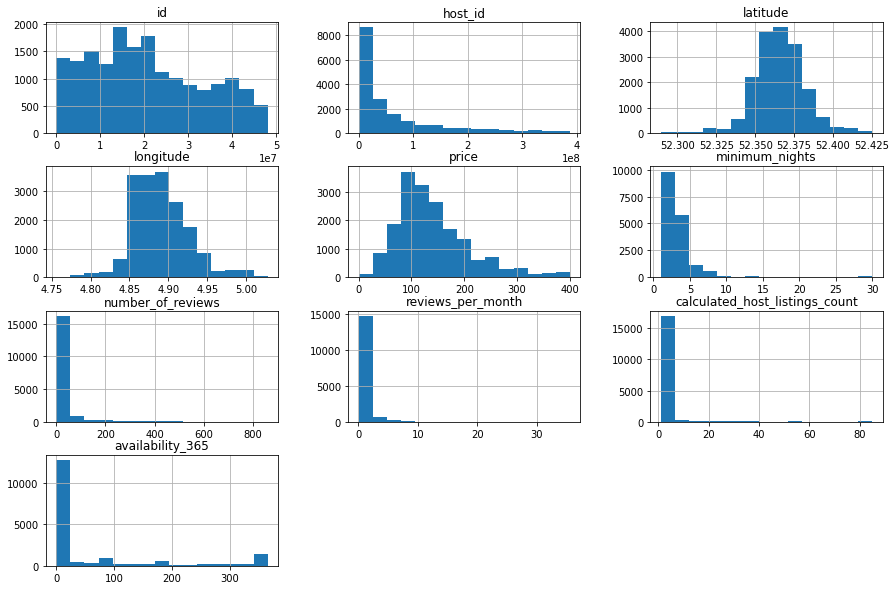

In [10]:
#Removendo outliers em um novo DataFrame
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price>400].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

#Remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Na secção de conclusão será feita um análise mais detalhada dos gráficos.

In [63]:
# ver a média da coluna `price``
print("média de preços dos imóveis €{:.2f}".format(df_clean.price.mean()))

média de preços dos imóveis €140.61


### **Q5. Qual a correlação existente entre as variáveis**

<img alt="Correlação" width="300%" src="https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg">

A correlação representa a correspondência entre duas coisas, Neste caso entre duas variáveis. Essa relação é medida em função do coeficiente de correlação que varia de -1 a 1. Para identeificar as correlações existentes neste problema será necessário:
  * Gerar uma matriz de correlação das variáveis de interesse.
  * Gerar um heatmap dessa matriz usando a biblioteca `seaborn`, para melhor vizualização.




In [12]:
# criar uma matriz de correlação
corr=df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.011095,-0.135907,-0.176454,0.026912,0.046149
minimum_nights,0.011095,1.000000,-0.073949,-0.100155,-0.025505,0.017619
number_of_reviews,-0.135907,-0.073949,1.000000,0.823126,-0.025613,0.259703
reviews_per_month,-0.176454,-0.100155,0.823126,1.000000,-0.005749,0.303224
calculated_host_listings_count,0.026912,-0.025505,-0.025613,-0.005749,1.000000,0.019136
availability_365,0.046149,0.017619,0.259703,0.303224,0.019136,1.000000


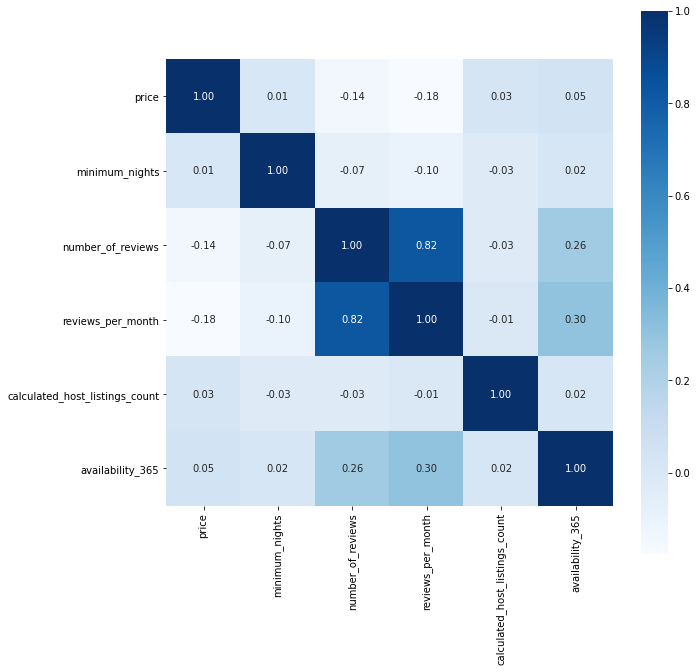

In [13]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,10))
sns.heatmap(corr, fmt='.2f' ,cmap='Blues',annot=True, square=True);

Pode-se perceber que as únicas variáveis que apresentam uma correlação forte são as `number_of_reviews` e `reviews_per_month`. O que faz todo sentido.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
Se você já alugou algo no site do Airbnb sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas. 
Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()` para a variável `room_type` 

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13856
Private room        3785
Hotel room           121
Shared room           47
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.778034
Private room       0.212533
Hotel room         0.006794
Shared room        0.002639
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**
Para verificar uma variável em função de outra é usado o método `groupby()`. No caso, queremos comprar os bairros a partir do preço de locação.



In [39]:
# ver preços por bairros, na média
# ver preços por bairros, na média
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])
print("Desvio padrão {}".format(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].describe()['std']))

neighbourhood
Centrum-Oost                157.812166
IJburg - Zeeburgereiland    155.347932
Centrum-West                152.687171
Zuid                        152.175859
De Pijp - Rivierenbuurt     150.419413
Westerpark                  142.450509
De Baarsjes - Oud-West      140.577347
Oud-Oost                    139.259259
Watergraafsmeer             136.306202
Buitenveldert - Zuidas      134.902439
Name: price, dtype: float64
Desvio padrão 8.389764419946642


Apesar dos valores acima, ainda não podemos afirmar quais são os bairros mais caros, pois podem existir bairros com poucos registros de casas, elevando significativamente a média desses lugares, para isso irei considerar bairros com no mínimo 50 registros feitos, assim é possível ter uma resposta mais concreta de quais bairros são os mais caras de acordo com esse conjunto de dados


In [41]:
df_clean1 = df_clean[df_clean.groupby("neighbourhood")['neighbourhood'].transform('size') > 50]
print(df_clean1.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])
print("Desvio padrão {}".format(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].describe()['std']))

neighbourhood
Centrum-Oost                157.812166
IJburg - Zeeburgereiland    155.347932
Centrum-West                152.687171
Zuid                        152.175859
De Pijp - Rivierenbuurt     150.419413
Westerpark                  142.450509
De Baarsjes - Oud-West      140.577347
Oud-Oost                    139.259259
Watergraafsmeer             136.306202
Buitenveldert - Zuidas      134.902439
Name: price, dtype: float64
Desvio padrão 8.389764419946642


**Não houve alteração!**

Vimos acima que os bairros neighbourhood
*Centrum-Oost*, *IJburg - Zeeburgereiland*,*Centrum-West* são em média os mais caros de amsterdam. 
Apesar disso, é possivel ver que esses valores não variam muito em entre os 10 primeiros bairros com um desvião padrão 8.39 aproximadamente, valor relativamente baixo em relação aos preços de locação. Isso pode ser um grande indicativo de uma baixa desigualdade social presente no país. Enquanto em algumas cidades brasileiras a região influência diretamente no preço de locação como por exemplo no Rio de janeiro, onde é possível perceber uma grande diferença entre os valores do aluguel de um imóvel no Leblon e outro no Vaz lobo.    

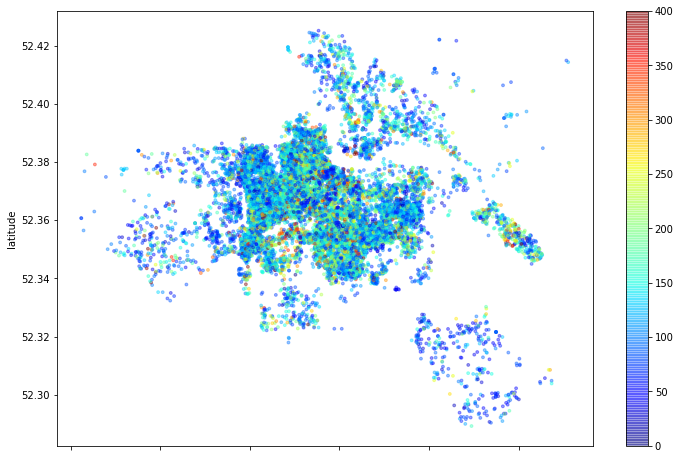

In [55]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean.price, s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

In [56]:
df_clean.price.describe() 

count    17809.000000
mean       140.608737
std         69.520681
min          0.000000
25%         93.000000
50%        125.000000
75%        175.000000
max        400.000000
Name: price, dtype: float64

In [57]:
df_clean1.neighbourhood.value_counts().sort_values(ascending=False)[:10]/df_clean.shape[0]

De Baarsjes - Oud-West                    0.168061
De Pijp - Rivierenbuurt                   0.124375
Centrum-West                              0.106800
Centrum-Oost                              0.084002
Westerpark                                0.077152
Zuid                                      0.070245
Oud-Oost                                  0.065192
Bos en Lommer                             0.058117
Oostelijk Havengebied - Indische Buurt    0.048178
Oud-Noord                                 0.031501
Name: neighbourhood, dtype: float64

Pelo gráfico plotado é possível notar que a grande maioria do preços dos imóveis estão abaixo de €175,00, assim como confirmamos pelo 3 quartil. Temos também que os bairros com mais opções para locação são os `De Baarsjes - Oud-West`,`De Pijp - Rivierenbuurt` e `Centrum-West`.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [61]:
# ver a média da coluna `minimum_nights``
print("Média de número mínimo de noites para locação: {:.2f}".format(df_clean.minimum_nights.mean()))

Média de número mínimo de noites para locação: 3.05


## Conclusões


Neste Trabalho foi realizada uma análise superficial na base de dados do Airbnb, contudo já se percebeu a presença de alguns *outliers* e valores de variáveis ausentes. 

Também notou-se uma distribuição bastante uniforme nos preços para diferentes bairros, o que pode ser um grande indicativo de uma baixa desigualdade social no país, além disso foi percebido que os valores de locação estão em média  próximos a €140,00.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Qualquer dúvida ou sugestão é bem vinda.

Meus contatos:
*   ricksonencaut@gmail.com
*   [Linkdin](https://www.linkedin.com/in/rickson-gomes-monteiro-411a2a1a1/)
*   [Medium](https://ricksonencaut.medium.com/)



